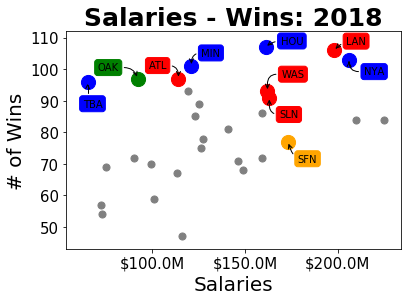

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1572.
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          1.65e-226
Time:                        13:37:05   Log-Likelihood:                -1927.7
No. Observations:                 420   AIC:                             3863.
Df Residuals:                     416   BIC:                             3880.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -898.1717     28.975    -30.998      0.0

In [3]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from matplotlib.ticker import FuncFormatter

teams=pd.read_csv('Teams.csv')

teams=teams[teams['yearID'] >=1985]
teams=teams[['yearID', 'teamID', 'Rank', 'R','RA','G', 'W', 'H', 'BB','HBP', 'AB', 'SF','HR','2B', '3B']]

teams=teams.set_index(['yearID','teamID'])


salaries=pd.read_csv('Salaries.csv')

salaries_by_yearID_teamID= salaries.groupby(['yearID','teamID',])['salary'].sum()


teams=teams.join(salaries_by_yearID_teamID)


def millions(x, pos):
    "The two args are the value and tick position"
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

def plot_spending_wins(teams, year):
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'NYA':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="blue", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="blue"),
                        xytext=(15, -15), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))

                
        elif i == 'TBA':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='blue', s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                       bbox=dict(boxstyle='round', color='blue'),
                       xytext=(-5, -25), textcoords='offset points',
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
                        
        elif i == 'MIN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='blue', s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                       bbox=dict(boxstyle='round', color='blue'),
                       xytext=(10, 10), textcoords='offset points',
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
                       
        elif i == 'HOU':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='blue', s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                       bbox=dict(boxstyle='round', color='blue'),
                       xytext=(15, 3), textcoords='offset points',
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=45,rad=10"))
                        
        elif i == 'ATL':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='red', s=200)
            ax.annotate(i,(teams_year['salary'][i], teams_year['W'][i]),
                       bbox=dict(boxstyle='round', color='red'),
                       xytext=(-30, 10), textcoords='offset points',
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
                        
        elif i == 'WAS':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='red', s=200)
            ax.annotate(i,(teams_year['salary'][i], teams_year['W'][i]),
                       bbox=dict(boxstyle='round', color='red'),
                       xytext=(14, 14), textcoords='offset points',
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
                        
        elif i == 'LAN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='red', s=200)
            ax.annotate(i,(teams_year['salary'][i], teams_year['W'][i]),
                       bbox=dict(boxstyle='round', color='red'),
                       xytext=(12, 6), textcoords='offset points',
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=45,rad=10"))
        
        elif i == 'SLN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='red', s=200)
            ax.annotate(i,(teams_year['salary'][i], teams_year['W'][i]),
                       bbox=dict(boxstyle='round', color='red'),
                       xytext=(10, -20), textcoords='offset points',
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
            
        elif i == 'OAK':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='green', s=200)
            ax.annotate(i,(teams_year['salary'][i], teams_year['W'][i]),
                       bbox=dict(boxstyle='round', color='green'),
                       xytext=(-40, 8), textcoords='offset points',
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=110,rad=10"))
        
        elif i == 'SFN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='orange', s=200)
            ax.annotate(i,(teams_year['salary'][i], teams_year['W'][i]),
                       bbox=dict(boxstyle='round', color='orange'),
                       xytext=(10, -20), textcoords='offset points',
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=110,rad=10"))
                        
        else: 
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color='grey', s=50)
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.set_xlabel('Salaries', fontsize=20)
        ax.set_ylabel('# of Wins' , fontsize=20)
        ax.set_title('Salaries - Wins: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()
    




plot_spending_wins(teams, 2018)


    
teams['BA']=teams['H']/teams['AB']
teams['OBP']=(teams['H']+teams['BB']+teams['HBP'])/(teams['AB']+teams['BB']+teams['HBP']+teams['SF'])
teams['SLG']=(teams['H']+teams['2B']+(2*teams['3B'])+(3*teams['HR']))/teams['AB']

import statsmodels.formula.api as sm

#First Model: Batting Average
runs_reg_model1=sm.ols("R~OBP+SLG+BA",teams)
runs_reg1=runs_reg_model1.fit()
#Second Model: On-base Percentage
runs_reg_model2=sm.ols("R~OBP+SLG",teams)
runs_reg2=runs_reg_model2.fit()
#Third model: Slugging Percentage
runs_reg_model3=sm.ols("R~BA",teams)
runs_reg3=runs_reg_model3.fit()

print(runs_reg1.summary())
print(runs_reg2.summary())
print(runs_reg3.summary())
    